In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import utils.spike_utils as spike_utils
import utils.classifier_utils as classifier_utils
import utils.visualization_utils as visualization_utils

import os
import pandas as pd
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
PRE_INTERVAL = 1300
POST_INTERVAL = 1500
INTERVAL_SIZE = 100
EVENT = "FeedbackOnset"

# output dir that was specified in the decode_features_with_pseudo.py
OUTPUT_DIR = "/data/patrick_res/pseudo"
HYAK_OUTPUT_DIR = "/data/patrick_res/hyak/pseudo"

SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"

FEATURE_DIMS = ["Color", "Shape", "Pattern"]

Text(0, 0.5, 'Decoder Accuracy')

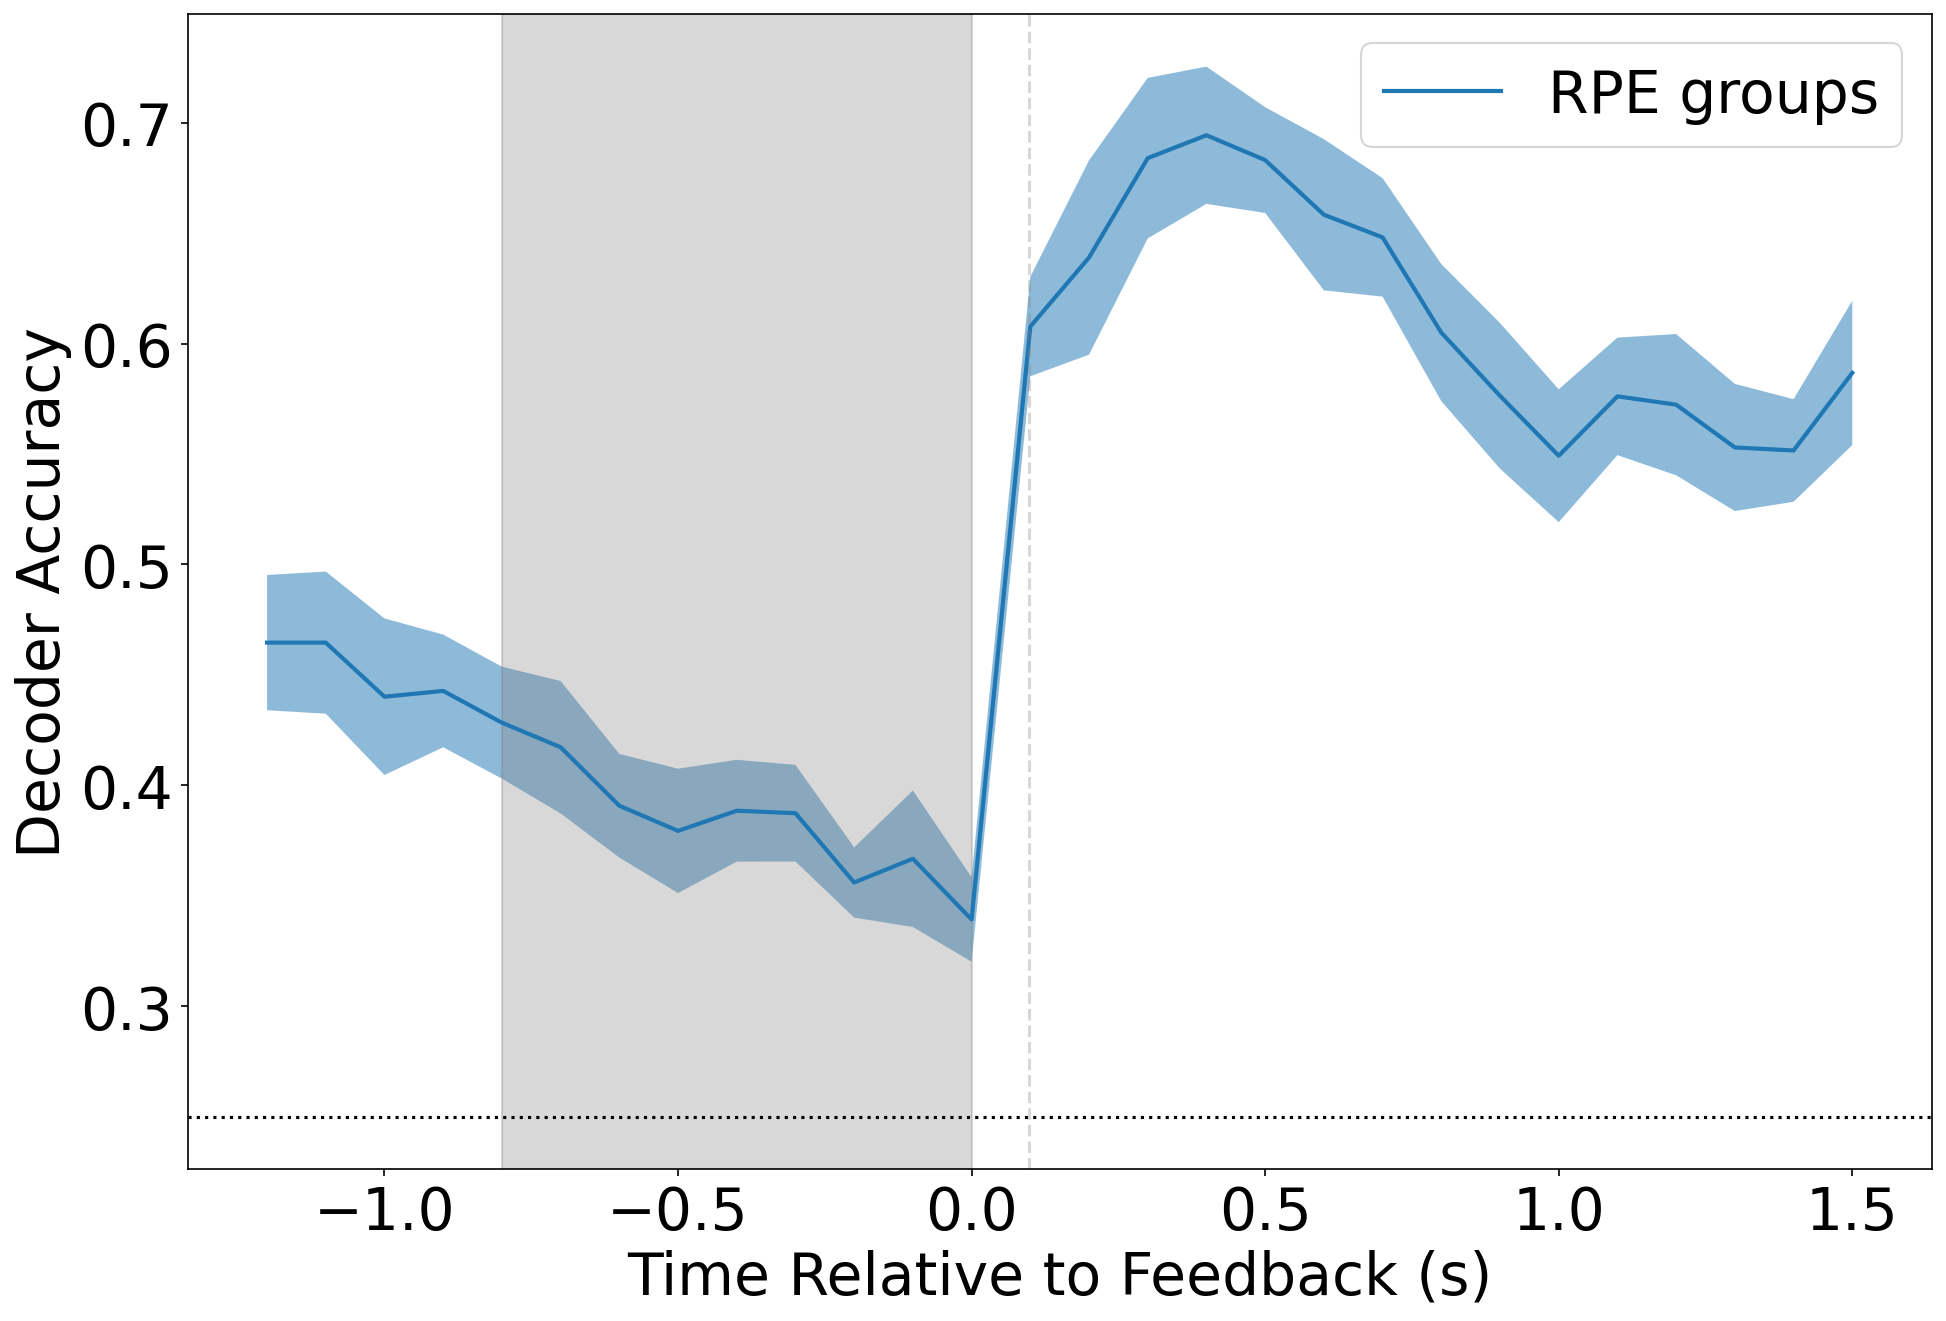

In [8]:
# matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
test_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_no_proj_test_accs.npy"))

# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    test_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"RPE groups",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

In [9]:
valid_sess = pd.read_pickle(SESSIONS_PATH)
positions = spike_utils.get_unit_positions(valid_sess)
positions = positions[positions.manual_structure != "unknown"]

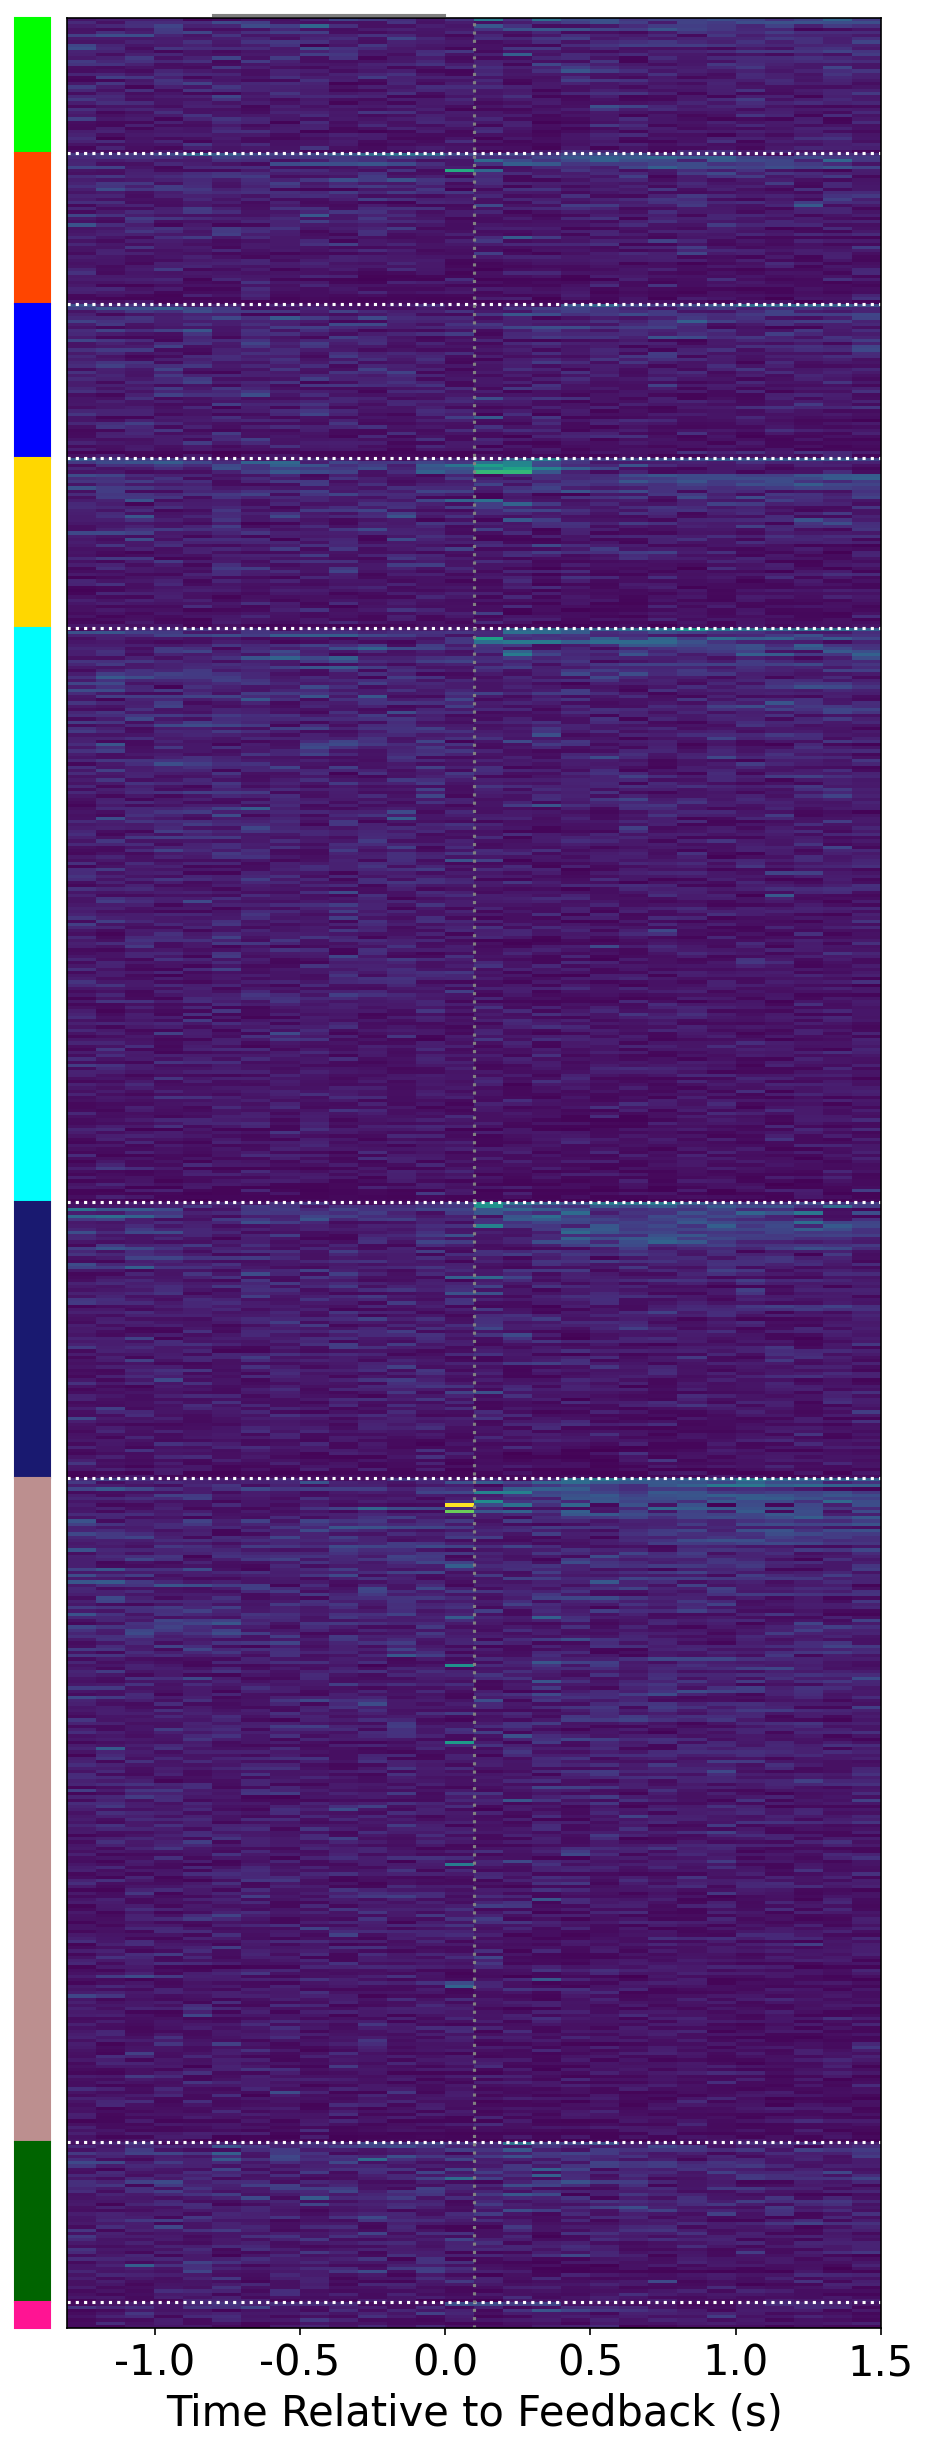

In [10]:
models = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_no_proj_models.npy"), allow_pickle=True)
num_neurons = models[0, 0].coef_.shape[1]
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=num_neurons, num_classes=4)

norm_weights = weights / np.sum(weights, axis=0)
# norm_weights = weights
means = np.mean(norm_weights, axis=1)
rpe_ordering_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7, 20), dpi=150, sharex=True)
visualization_utils.visualize_weights(
    positions, 
    norm_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=rpe_ordering_df,
    ax=ax
)
# set_title(f"{feature_dim} Low Abs RPE")

In [5]:
import scipy 

def get_orth_decoding_axes_for_time_bins(time_bin_idxs):
    weights_across_time = []
    models = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_no_proj_models.npy"), allow_pickle=True)
    for time_idx in time_bin_idxs:
        weights = []
        for i, model_split in enumerate(models[time_idx, :]):
            weights.append(model_split.coef_.T)
        mean_across_splits = np.mean(weights, axis=0)
        weights_across_time.append(mean_across_splits)
    axes = np.hstack(weights_across_time)
    orth_axes = scipy.linalg.orth(axes)
    return orth_axes

In [11]:
time_idxs = np.arange(13, 28, 1)
orth_axes = get_orth_decoding_axes_for_time_bins(time_idxs)

In [ ]:
np.save("/data/patrick_res/orth_axes_rpe_group_fb.npy", orth_axes)


### Confidence split by cor/inc

Text(0, 0.5, 'Decoder Accuracy')

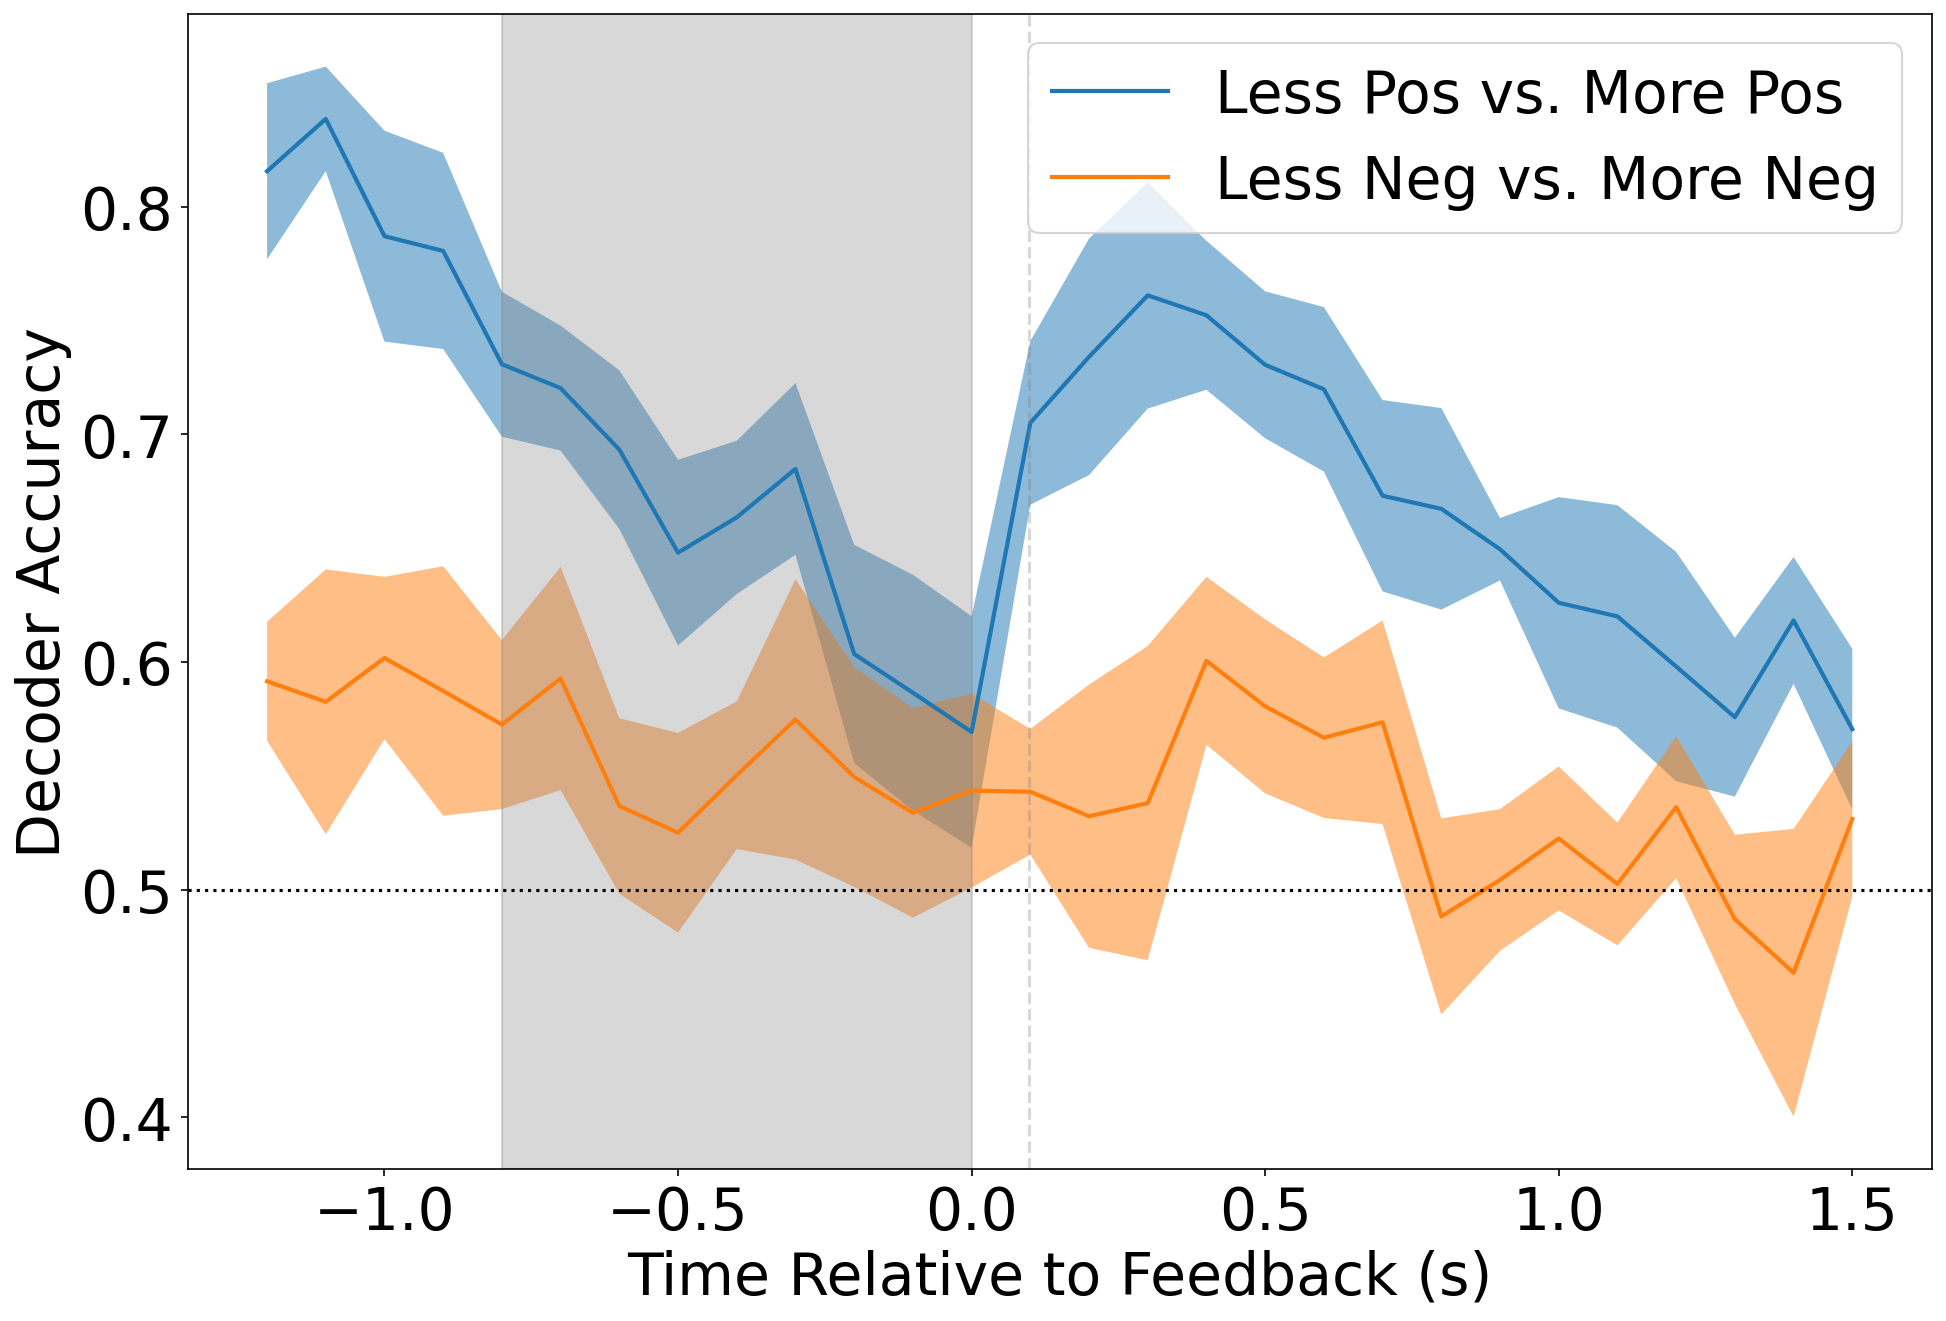

In [21]:
# matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
cor_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_no_proj_cor_bal_test_accs.npy"))
inc_accs = np.load(os.path.join(HYAK_OUTPUT_DIR, f"rpe_groups_no_proj_inc_bal_test_accs.npy"))

# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    cor_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Less Pos vs. More Pos",
    right_align=True, 
)
# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    inc_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Less Neg vs. More Neg",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.5, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

### What about confidence?

Text(0, 0.5, 'Decoder Accuracy')

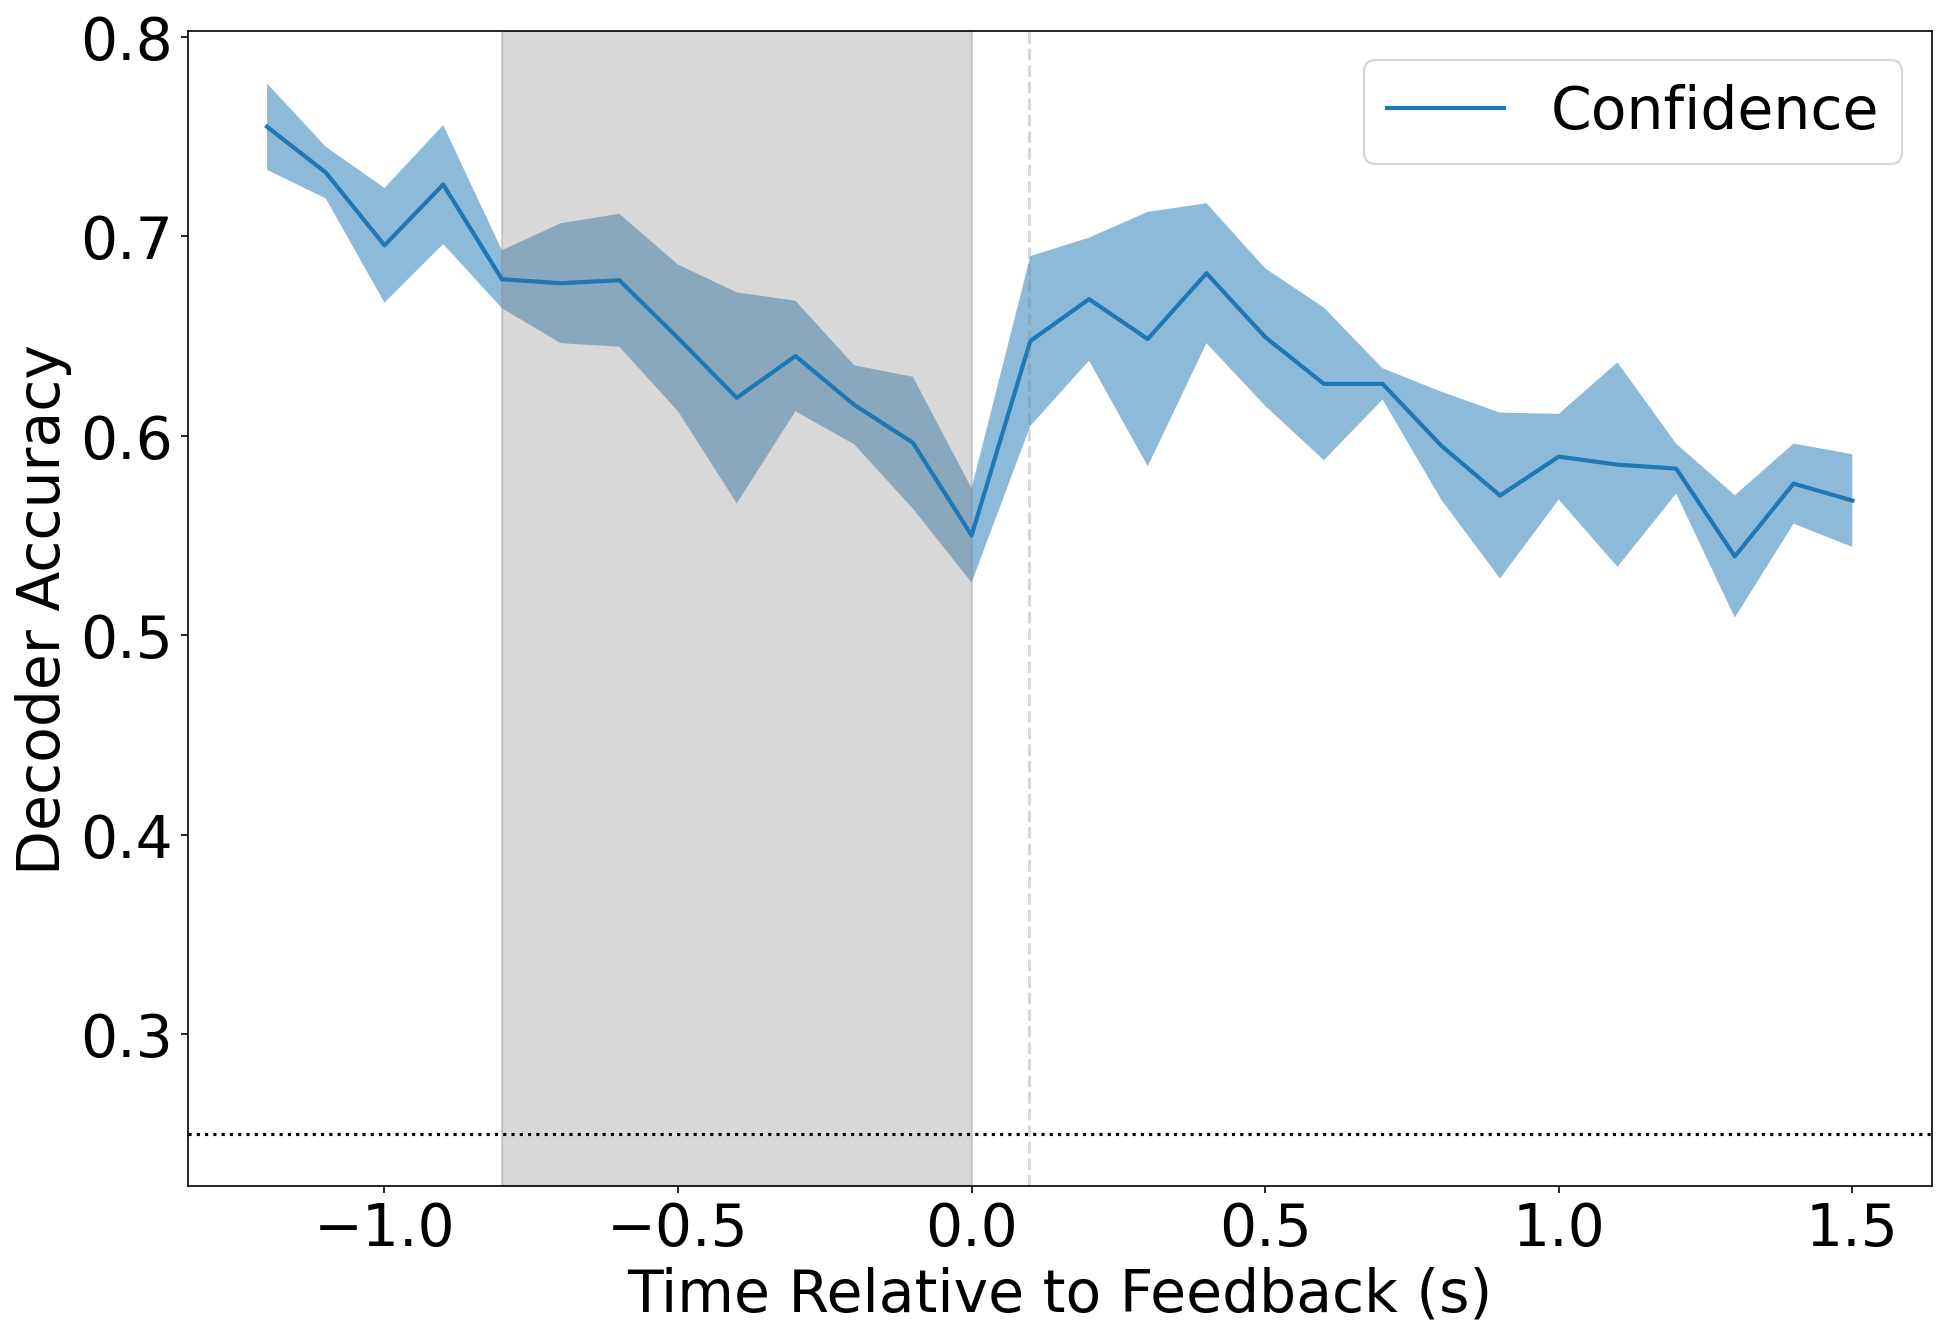

In [30]:
# matplotlib.rcParams.update({'font.size': 28})
matplotlib.rcParams.update({'font.size': 28})
fig, ax = plt.subplots(dpi=150, figsize=(15, 10))
test_accs = np.load(os.path.join(OUTPUT_DIR, f"confidence_groups_test_accs.npy"))

# plots the mean and standard deviation of decoding accuracy across splits, by time. 
visualization_utils.visualize_accuracy_across_time_bins(
    test_accs,
    PRE_INTERVAL / 1000, POST_INTERVAL / 1000, INTERVAL_SIZE / 1000,  # by default these are in seconds
    ax,
    label=f"Confidence",
    right_align=True, 
)
ax.legend()
# add grey band for selection period
ax.axvspan(-0.8, 0, alpha=0.3, color='gray')
# add dotted line for feedback start
ax.axvline(0.098, alpha=0.3, color='gray', linestyle='dashed')
# add estimated chance
ax.axhline(0.25, color='black', linestyle='dotted', label="Estimated Chance")
ax.set_xlabel("Time Relative to Feedback (s)")
ax.set_ylabel("Decoder Accuracy")

In [6]:
models = np.load(os.path.join(OUTPUT_DIR, f"confidence_groups_models.npy"), allow_pickle=True)
num_neurons = models[0, 0].coef_.shape[1]
# evaluate weights by time. Pass in number of neurons and number of classes
weights = classifier_utils.evaluate_model_weights_by_time_bins(models, num_neurons=num_neurons, num_classes=2)

norm_weights = weights / np.sum(weights, axis=0)

means = np.mean(norm_weights, axis=1)
ordering_df = pd.DataFrame({'np_idx': np.arange(len(means)), 'weight': means})
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(7, 20), dpi=150, sharex=True)
visualization_utils.visualize_weights(
    positions, 
    norm_weights, 
    "manual_structure", 
    name_to_color=visualization_utils.REGION_TO_COLOR, 
    add_region=True, 
    mean_weights_df=ordering_df,
    ax=ax
)
# set_title(f"{feature_dim} Low Abs RPE")

FileNotFoundError: [Errno 2] No such file or directory: '/data/patrick_res/pseudo/confidence_groups_models.npy'

In [8]:
norm_weights.shape

(634, 28)